# Energy Market Simulator Analysis

The provided Python script is designed to simulate an energy market. It uses a battery to store and discharge energy based on the market prices. The simulation runs for a specified date range and uses a specified price model. The price model can be either a simulated price model or a historical price model based on a CSV file.

The script starts by parsing command-line arguments for the battery capacity, charge efficiency, discharge efficiency, start date, end date, price model, and CSV file path. These arguments are used to create the necessary dependencies for the simulation, such as the battery, price model, and scheduler.

The `main()` function then creates an instance of `EnergyMarketSimulator` with the created dependencies and runs the simulation. The simulation results are logged and returned by the `main()` function.

The simulation results are a list of tuples containing the date, schedule DataFrame, and daily profit and loss (PnL). You can convert these results into a DataFrame for easier analysis and calculate the total PnL and other summary statistics.

You can also visualize the financial performance by plotting the daily PnL. This can give you an idea of how profitable the battery was on each day of the simulation.

Additionally, you can aggregate the total charge and total discharge for each day and plot them. This can give you an idea of how the battery was utilized on each day of the simulation.

The script can be run from the command line with the desired arguments. If no arguments are provided, the script uses default values. The script also handles exceptions and logs any errors that occur during the simulation.

In [3]:
# Import necessary libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

module_path = os.path.abspath(os.path.join('../'))

if module_path not in sys.path:
    sys.path.append(module_path)

from main import run_simulation

%matplotlib inline

In [4]:
def run_energy_market_simulator(start_date, end_date, battery_capacity, price_model):
    # Backup the original arguments
    original_args = sys.argv
    csv_path = os.path.join(module_path, "data", "time_series", "time_series_60min_singleindex_filtered.csv")

    # Set the new arguments
    sys.argv = ['app.py', 
                '--start_date', start_date, 
                '--end_date', end_date, 
                '--battery_capacity', str(battery_capacity),
                '--price_model', price_model,
                '--csv_path', csv_path,
                '--log_level','INFO' ]

    # Call the main function
    results = run_simulation()

    # Restore the original arguments
    sys.argv = original_args

    return results

In [5]:
def plot_results(results, title):
    # Convert the results into a DataFrame for easier analysis
    results_df = pd.DataFrame(results, columns=['Date', 'Schedule', 'Daily PnL'])

    # Summary statistics
    print(results_df.describe())

    # Plot Daily P&L
    plt.figure(figsize=(10, 6))
    plt.plot(results_df['Date'], results_df['Daily PnL'], marker='o', linestyle='-', color='blue')
    plt.title(f'Daily Profit and Loss ({title})')
    plt.xlabel('Date')
    plt.ylabel('P&L')
    plt.grid(True)
    plt.show()

    # Aggregate Total Charge and Total Discharge for each day
    results_df['Total Charge'] = results_df['Schedule'].apply(lambda df: df['Charge'].sum())
    results_df['Total Discharge'] = results_df['Schedule'].apply(lambda df: df['Discharge'].sum())

    plt.figure(figsize=(10, 6))
    plt.plot(results_df['Date'], results_df['Total Charge'], label='Total Charge', color='green')
    plt.plot(results_df['Date'], results_df['Total Discharge'], label='Total Discharge', color='red')
    plt.title(f'Daily Battery Utilization ({title})')
    plt.xlabel('Date')
    plt.ylabel('Energy (MWh)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
start_date = '2015-02-01'
end_date = '2015-12-01'
battery_capacity = 10

Processing Days: 100%|██████████| 304/304 [00:53<00:00,  5.73it/s]
2024-05-10 20:16:32,561 - INFO - Total P&L from 2015-02-01 to 2015-12-01: 470103.6400842097


         Daily PnL
count   304.000000
mean   1546.393553
std     156.243019
min    1228.449852
25%    1458.517610
50%    1516.628189
75%    1589.123705
max    2283.633827


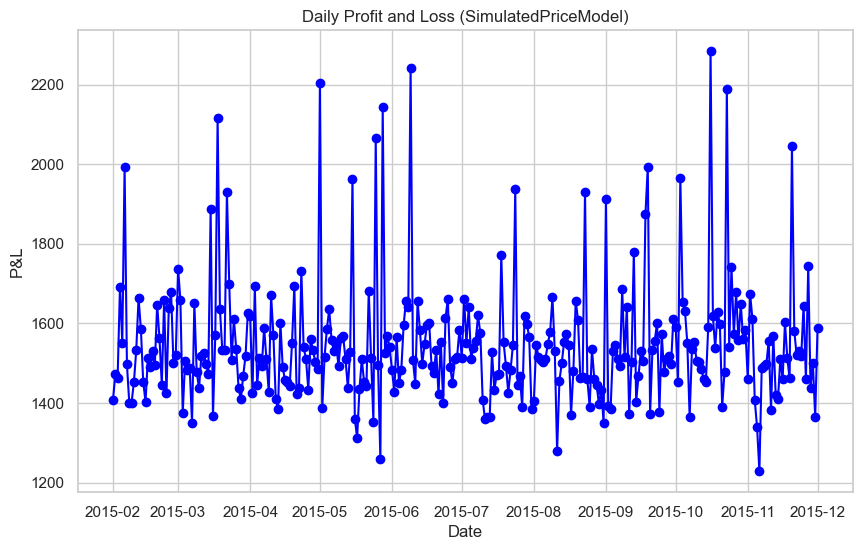

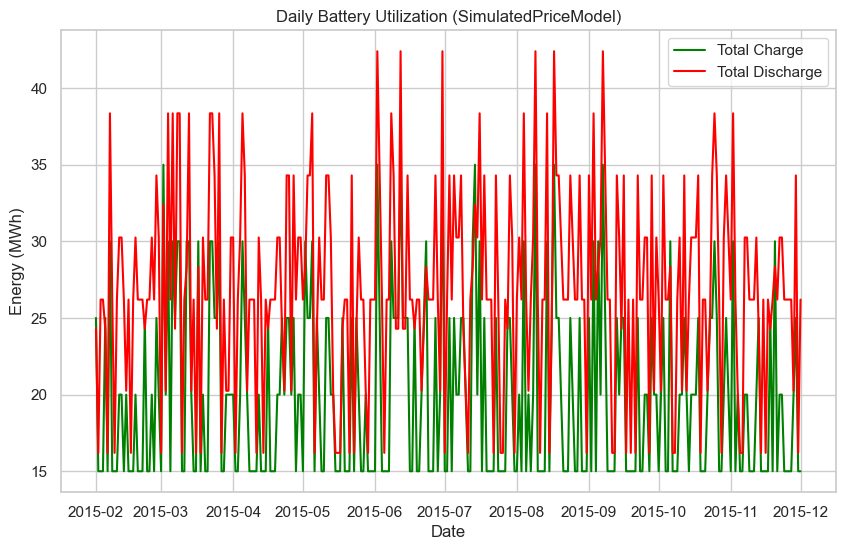

In [7]:
# Run the simulation for the SimulatedPriceModel
results_simulated = run_energy_market_simulator(start_date, end_date, battery_capacity, 'SimulatedPriceModel')
plot_results(results_simulated, 'SimulatedPriceModel')

Processing Days: 100%|██████████| 304/304 [00:56<00:00,  5.39it/s]
2024-05-10 20:17:34,235 - INFO - Total P&L from 2015-02-01 to 2015-12-01: 193197.5626777778


         Daily PnL
count   304.000000
mean    635.518298
std     115.363088
min     379.870111
25%     550.783061
50%     620.425672
75%     722.280900
max    1406.566122


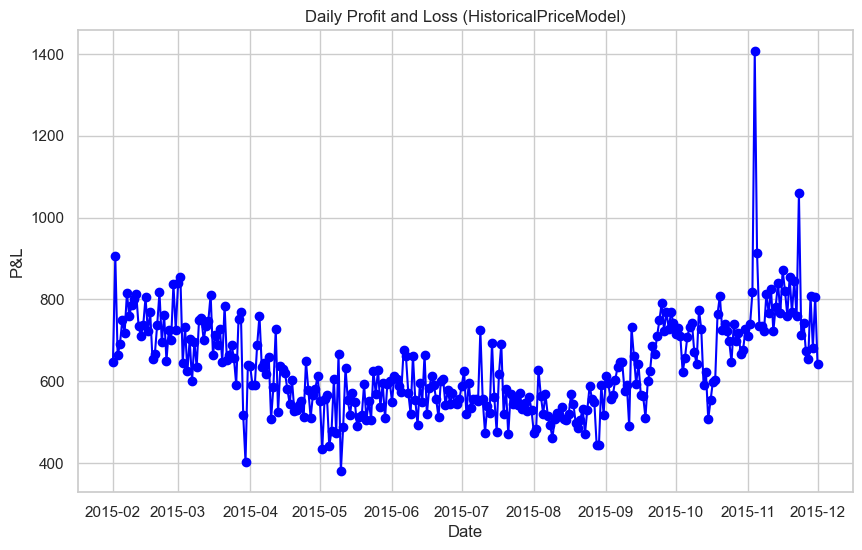

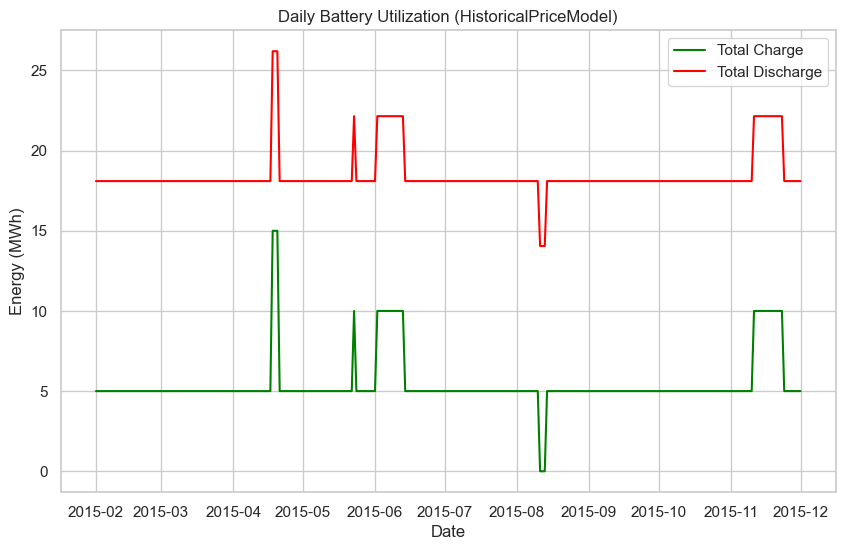

In [8]:
# Run the simulation for the HistoricalPriceModel
results_historical = run_energy_market_simulator(start_date, end_date, battery_capacity, 'HistoricalPriceModel')
plot_results(results_historical, 'HistoricalPriceModel')